In [45]:
import pymongo as pm 
import pprint
#import MongoClient only 
client = pm.MongoClient('bigdatadb.polito.it',                     
                        ssl=True,                     
                        authSource = 'carsharing',                     
                        username = 'ictts',                     
                        password ='Ict4SM22!',                     
                        tlsAllowInvalidCertificates=True) 
db = client['carsharing'] 
#Choose the DB to use 
active_booking = db['ActiveBookings']
active_parking = db['ActiveParkings']
permenant_booking = db['PermanentBookings']
permenant_parking = db['PermanentParkings']

enjoy_active_booking = db['enjoy_ActiveBookings']
enjoy_active_parking = db['enjoy_ActiveParkings']
enjoy_permenant_booking = db['enjoy_PermanentBookings']
enjoy_permenant_parking = db['enjoy_PermanentParkings']




In [88]:
start_unix_time = datetime(2017, 11, 1, 0, 0, 0).replace(tzinfo=timezone.utc).timestamp()
end_unix_time = datetime(2018, 1, 31, 23, 59, 59).replace(tzinfo=timezone.utc).timestamp()

booking_locations = list(enjoy_permenant_booking.aggregate([
    {'$match': {'city': 'Torino'}},
    {'$project': {
        '_id': 0,
        'duration': {'$divide': [{'$subtract': ['$final_time', '$init_time']}, 60]},
        'plate': 1,
        'city': 1,
        'init_time': 1,
        'init_date': 1,
        'year': {'$year': '$init_date'},
        'month': {'$month': '$init_date'},
        'day': {'$dayOfWeek': '$init_date'},
        'hour': {'$hour': '$init_date'},
        'origin_longitude': {'$arrayElemAt': [{'$arrayElemAt':['$origin_destination.coordinates',0]}, 1]},
        'origin_latitude': {'$arrayElemAt': [{'$arrayElemAt':['$origin_destination.coordinates',0]}, 0]},
        'dest_longitude': {'$arrayElemAt': [{'$arrayElemAt':['$origin_destination.coordinates',1]}, 1]},
        'dest_latitude': {'$arrayElemAt': [{'$arrayElemAt':['$origin_destination.coordinates',1]}, 0]}
    }},
    {'$match': {
        'duration': {'$gte': 5}, 
        'init_time': {'$gte': start_unix_time, '$lte': end_unix_time},
        'hour': {'$gte': 8, '$lt': 10},
        'day':{'$gte': 1, '$lte':5}
    }}
]))

my_pd = pd.DataFrame(booking_locations)
print(len(booking_locations))


3195


In [64]:
# print(my_pd['latitude'].iloc[0])

In [89]:
import geopandas as gpd
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import folium
from datetime import datetime, timezone

longitude = my_pd['dest_longitude'].iloc[:]
latitude = my_pd['dest_latitude'].iloc[:]
fina_df = my_pd[['dest_latitude','dest_longitude']]

my_geometry = gpd.points_from_xy(latitude,longitude,crs='EPSG:4326')

gdf = GeoDataFrame(fina_df, geometry=my_geometry)
gdf.explore()

In [90]:
start_unix_time = datetime(2017, 11, 1, 0, 0, 0).replace(tzinfo=timezone.utc).timestamp()
end_unix_time = datetime(2018, 1, 31, 23, 59, 59).replace(tzinfo=timezone.utc).timestamp()

booking_locations = list(enjoy_permenant_booking.aggregate([
    {'$match': {'city': 'Torino'}},
    {'$project': {
        '_id': 0,
        'duration': {'$divide': [{'$subtract': ['$final_time', '$init_time']}, 60]},
        'plate': 1,
        'city': 1,
        'init_time': 1,
        'init_date': 1,
        'year': {'$year': '$init_date'},
        'month': {'$month': '$init_date'},
        'day': {'$dayOfWeek': '$init_date'},
        'hour': {'$hour': '$init_date'},
        'origin_longitude': {'$arrayElemAt': [{'$arrayElemAt':['$origin_destination.coordinates',0]}, 1]},
        'origin_latitude': {'$arrayElemAt': [{'$arrayElemAt':['$origin_destination.coordinates',0]}, 0]},
        'dest_longitude': {'$arrayElemAt': [{'$arrayElemAt':['$origin_destination.coordinates',1]}, 1]},
        'dest_latitude': {'$arrayElemAt': [{'$arrayElemAt':['$origin_destination.coordinates',1]}, 0]}
    }},
    {'$match': {
        'duration': {'$gte': 5}, 
        'init_time': {'$gte': start_unix_time, '$lte': end_unix_time},
        'hour': {'$gte': 8, '$lt': 10},
        'day':{'$gte': 6, '$lte':7}
    }}
]))

my_pd = pd.DataFrame(booking_locations)
print(len(booking_locations))

import geopandas as gpd
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import folium
from datetime import datetime, timezone

longitude = my_pd['dest_longitude'].iloc[:]
latitude = my_pd['dest_latitude'].iloc[:]
fina_df = my_pd[['dest_latitude','dest_longitude']]

my_geometry = gpd.points_from_xy(latitude,longitude,crs='EPSG:4326')

gdf = GeoDataFrame(fina_df, geometry=my_geometry)
gdf.explore()


4190


In [95]:
start_unix_time = datetime(2017, 11, 1, 0, 0, 0).replace(tzinfo=timezone.utc).timestamp()
end_unix_time = datetime(2018, 1, 31, 23, 59, 59).replace(tzinfo=timezone.utc).timestamp()

booking_locations = list(enjoy_permenant_booking.aggregate([
    {'$match': {'city': 'Torino'}},
    {'$project': {
        '_id': 0,
        'duration': {'$divide': [{'$subtract': ['$final_time', '$init_time']}, 60]},
        'plate': 1,
        'city': 1,
        'init_time': 1,
        'init_date': 1,
        'year': {'$year': '$init_date'},
        'month': {'$month': '$init_date'},
        'day': {'$dayOfWeek': '$init_date'},
        'hour': {'$hour': '$init_date'},
        'origin_longitude': {'$arrayElemAt': [{'$arrayElemAt':['$origin_destination.coordinates',0]}, 1]},
        'origin_latitude': {'$arrayElemAt': [{'$arrayElemAt':['$origin_destination.coordinates',0]}, 0]},
        'dest_longitude': {'$arrayElemAt': [{'$arrayElemAt':['$origin_destination.coordinates',1]}, 1]},
        'dest_latitude': {'$arrayElemAt': [{'$arrayElemAt':['$origin_destination.coordinates',1]}, 0]}
    }},
    {'$match': {
        'duration': {'$gte': 5}, 
        'init_time': {'$gte': start_unix_time, '$lte': end_unix_time},
        'hour': {'$gte': 8, '$lt': 10},
        'day':{'$gte': 6, '$lte':7}
    }}
]))

my_pd = pd.DataFrame(booking_locations)
print(len(booking_locations))

import geopandas as gpd
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import folium
from datetime import datetime, timezone

longitude = my_pd['dest_longitude'].iloc[:]
latitude = my_pd['dest_latitude'].iloc[:]
fina_df = my_pd[['dest_latitude','dest_longitude']]

my_geometry = gpd.points_from_xy(latitude,longitude,crs='EPSG:4326')

gdf = GeoDataFrame(fina_df, geometry=my_geometry)
gdf.explore()


4190


In [97]:
start_unix_time = datetime(2017, 11, 1, 0, 0, 0).replace(tzinfo=timezone.utc).timestamp()
end_unix_time = datetime(2018, 1, 31, 23, 59, 59).replace(tzinfo=timezone.utc).timestamp()

booking_locations = list(enjoy_permenant_booking.aggregate([
    {'$match': {'city': 'Torino'}},
    {'$project': {
        '_id': 0,
        'duration': {'$divide': [{'$subtract': ['$final_time', '$init_time']}, 60]},
        'plate': 1,
        'city': 1,
        'init_time': 1,
        'init_date': 1,
        'year': {'$year': '$init_date'},
        'month': {'$month': '$init_date'},
        'day': {'$dayOfWeek': '$init_date'},
        'hour': {'$hour': '$init_date'},
        'origin_longitude': {'$arrayElemAt': [{'$arrayElemAt':['$origin_destination.coordinates',0]}, 1]},
        'origin_latitude': {'$arrayElemAt': [{'$arrayElemAt':['$origin_destination.coordinates',0]}, 0]},
        'dest_longitude': {'$arrayElemAt': [{'$arrayElemAt':['$origin_destination.coordinates',1]}, 1]},
        'dest_latitude': {'$arrayElemAt': [{'$arrayElemAt':['$origin_destination.coordinates',1]}, 0]}
    }},
    {'$match': {
        'duration': {'$gte': 5}, 
        'init_time': {'$gte': start_unix_time, '$lte': end_unix_time},
        'hour': {'$gte': 8, '$lt': 10},
        'day':{'$gte': 1, '$lte':2}
    }}
]))

my_pd = pd.DataFrame(booking_locations)
print(len(booking_locations))

import geopandas as gpd
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import folium
from datetime import datetime, timezone

longitude = my_pd['dest_longitude'].iloc[:]
latitude = my_pd['dest_latitude'].iloc[:]
fina_df = my_pd[['dest_latitude','dest_longitude']]

my_geometry = gpd.points_from_xy(latitude,longitude,crs='EPSG:4326')

gdf = GeoDataFrame(fina_df, geometry=my_geometry)
gdf.explore()


3195


# Trying

/opt/conda/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


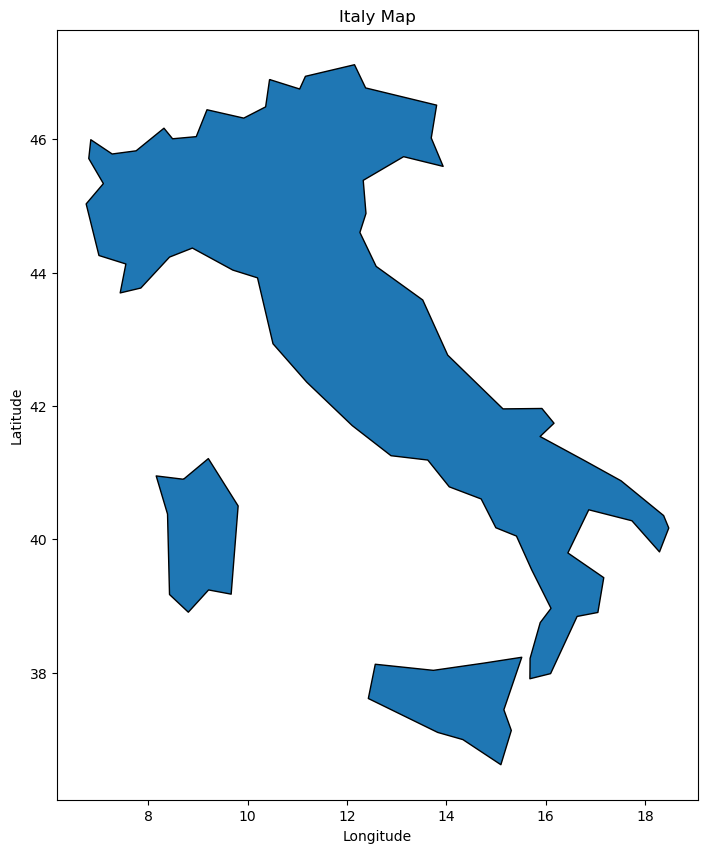

In [113]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load world dataset from GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter data to only show Italy
italy = world[world['name'] == 'Italy']

# Plot Turin city's map
italy.plot(edgecolor='black', linewidth=1, figsize=(10, 10))
plt.title("Italy Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
